In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.polynomial_basis import PolynomialNarmax

In [3]:
# Generate a dataset of a simulated dynamical system
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000,
    colored_noise=False,
    sigma=0.001,
    train_percentage=80
)

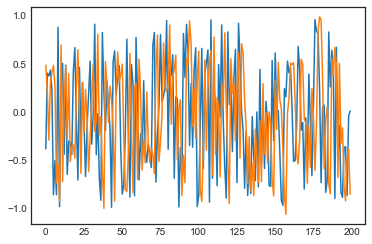

In [11]:
plt.plot(x_valid)
plt.plot(y_valid)

In [5]:
model = PolynomialNarmax(
    non_degree=2,
    order_selection=True,
    n_info_values=10,
    extended_least_squares=False,
    ylag=2,
    xlag=2,
    info_criteria='aic',
    estimator='least_squares'
)

In [6]:
model.fit(x_train, y_train)

In [7]:
yhat = model.predict(x_valid, y_valid)
results = pd.DataFrame(model.results(err_precision=8, dtype='dec'), 
                        columns=['Regressors', 'Parameters', 'ERR'])
print(results)

      Regressors Parameters         ERR
0        x1(k-2)     0.8999  0.95699482
1         y(k-1)     0.1999  0.03980439
2  x1(k-1)y(k-1)     0.0999  0.00319714
3         y(k-2)     0.0002  0.00000002
4   y(k-2)y(k-1)     0.0003  0.00000002
5  x1(k-2)y(k-1)    -0.0002  0.00000001


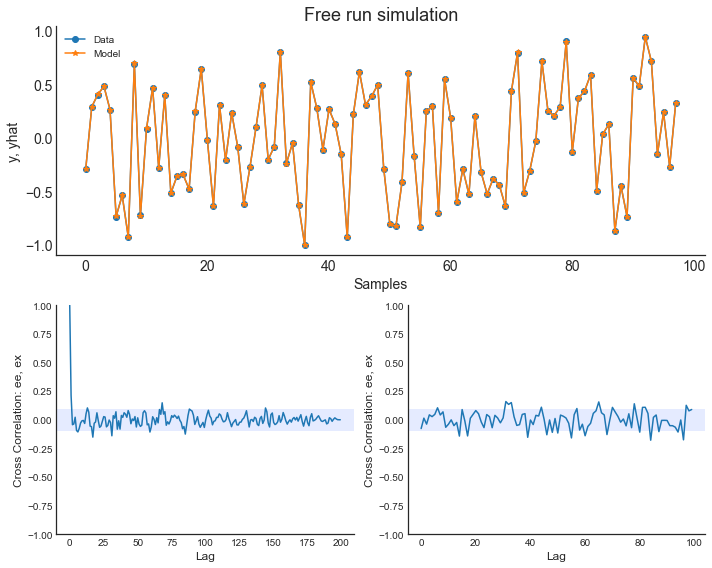

In [8]:
ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)